In [1]:
api_key = open('openai-api-key.txt').read().strip()
from openai import OpenAI
client = OpenAI(api_key=api_key)

In [2]:

example_json = '''
{
    "reasoning: : "Since the risk of infection is low, I will go to work by public transport without wearing a mask. I will also participate in a social activity with my friends."
    "go_to_work": true,
    "transport_public": true,
    "wear_mask": false,
    "social_activity": true
}
'''
agent_name = "John Lin"

In [2]:


prompt = f'''
{agent_name} is 25 years old. {agent_name} lives in Tamamushi City.
{agent_name} is currently aware that a virus is spreading across the country. Currently, {perc_pop_infected}% of the population in Tamamushi City has been infected.
{agent_name} has heard about the virus. He will assess the situation, and will make his decisions depending on the risk. For example, if the risk is low or not significant, he will go out without a mask (for example if the % of infected people is low).
{agent_name}'s friends are: Luca, Tommaso.

Given {agent_name}'s belief about the virus, he needs to make the following decisions:
- Go to work OR stay at home. His work cannot be done remotely.
- If {agent_name} goes to work, does he take the public transport (cheap but could expose you to infected people) or taxi (expensive, but safer)?
- Does {agent_name} wear a mask or not?
- After work, {agent_name} can decide if he wants to participate in a social activity with his friends.

Write a json that briefly summarises the reasoning and states the decisions {agent_name} made. 

Example:
{example_json}
'''

response = client.chat.completions.create(
model="gpt-3.5-turbo-1106",
response_format={ "type": "json_object" },
messages=[
    {"role": "system", "content": f"Impersonate John Lin. Output his decisions in JSON format."},
    {"role": "user", "content": prompt},
]
)

response.choices[0].message.content

NameError: name 'perc_pop_infected' is not defined

In [ ]:
results = []

In [6]:
perc_pop_infected_list = [0.0, 0.001, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0, 50.0]

behaviour_dict = {
        'scared' : f'{agent_name} is very scared of the virus, and will only get out of home if there is zero or minimal risk of getting infected. ',
        'cautious': f'{agent_name} will assess the situation, and will make his decisions depending on the risk. For example, if the risk is low or not significant, he will go out without a mask (for example if the percentage of infected people is realtively low).',
        'careless': f'{agent_name} is not afraid of the virus spreading in the city. {agent_name} doesn’t care about spreading the virus to his contacts, and disregards the well-being of others.'
    }



for perc_pop_infected in perc_pop_infected_list:
    
    for behaviour in behaviour_dict:
        for run_n in range(20):

            # if this run already appears in the results, skip it
            if any([x['perc_pop_infected'] == perc_pop_infected and x['behaviour'] == behaviour and x['run_n'] == run_n for x in results]):
                print(f'Skipping {perc_pop_infected} {behaviour} {run_n}')
                continue

            behaviour_prompt = behaviour_dict[behaviour]
            prompt = f'''
            {agent_name} is 25 years old. {agent_name} lives in Tamamushi City.
            {agent_name} is currently aware that a virus is spreading across the country. Currently, {perc_pop_infected}% of the population in Tamamushi City has been infected.
            {behaviour_prompt}
            {agent_name}'s friends are: Luca, Tommaso.

            Given {agent_name}'s belief about the virus, he needs to make the following decisions:
            - Go to work OR stay at home. His work cannot be done remotely.
            - If {agent_name} goes to work, does he take the public transport (cheap but could expose you to infected people) or taxi (expensive, but safer)?
            - Does {agent_name} wear a mask or not?
            - After work, {agent_name} can decide if he wants to participate in a social activity with his friends.

            Write a json that briefly summarises the reasoning and states the decisions {agent_name} made. 

            Example:
            {example_json} 
            '''

            response = client.chat.completions.create(
                    model="gpt-3.5-turbo-1106",
                    response_format={ "type": "json_object" },
                    messages=[
                        {"role": "system", "content": f"Impersonate {agent_name}. Output his decisions in JSON format."},
                        {"role": "user", "content": prompt},
                    ]
                    )

            response_str = response.choices[0].message.content
            new_dict = {
                    'perc_pop_infected': perc_pop_infected,
                    'behaviour': behaviour,
                    'run_n': run_n,
                    'output': response_str
                    }
            results.append(new_dict)

            print(new_dict)

Skipping 0.0 scared 0
Skipping 0.0 scared 1
Skipping 0.0 scared 2
Skipping 0.0 scared 3
Skipping 0.0 scared 4
Skipping 0.0 scared 5
Skipping 0.0 scared 6
Skipping 0.0 scared 7
Skipping 0.0 scared 8
Skipping 0.0 scared 9
Skipping 0.0 scared 10
Skipping 0.0 scared 11
Skipping 0.0 scared 12
Skipping 0.0 scared 13
Skipping 0.0 scared 14
Skipping 0.0 scared 15
Skipping 0.0 scared 16
Skipping 0.0 scared 17
Skipping 0.0 scared 18
Skipping 0.0 scared 19
Skipping 0.0 cautious 0
Skipping 0.0 cautious 1
Skipping 0.0 cautious 2
Skipping 0.0 cautious 3
Skipping 0.0 cautious 4
Skipping 0.0 cautious 5
Skipping 0.0 cautious 6
Skipping 0.0 cautious 7
Skipping 0.0 cautious 8
Skipping 0.0 cautious 9
Skipping 0.0 cautious 10
Skipping 0.0 cautious 11
Skipping 0.0 cautious 12
Skipping 0.0 cautious 13
Skipping 0.0 cautious 14
Skipping 0.0 cautious 15
Skipping 0.0 cautious 16
Skipping 0.0 cautious 17
Skipping 0.0 cautious 18
Skipping 0.0 cautious 19
Skipping 0.0 careless 0
Skipping 0.0 careless 1
Skipping 0.0

In [9]:
len(results)

900

In [10]:
# save results with pickle
import pickle
pickle.dump(results, open('results.pkl', 'wb'))

In [11]:
# load results with pickle
import pickle

results_load = pickle.load(open('results.pkl', 'rb'))

In [12]:
import pandas as pd

# turn results_load into a dataframe

new_list = []

for result in results_load:
        # convert output to string, replace true with True, false with False, none with None
        output = result['output']
        output = output.replace('true', 'True')
        output = output.replace('false', 'False')
        output = output.replace('none', 'None')
        output = output.replace('null', 'None')

        # remove spaces and '/n' from output
        #output = output.replace(' ', '')
        output = output.replace('\n', '')

        # convert string to dictionary

        output_dict = eval(output)

        
        try:
                reasoning = output_dict['reasoning']
        except:
                reasoning = None

        try:
                go_to_work = output_dict['go_to_work']
        except:
                go_to_work = None

        try:
                transport_public = output_dict['transport_public']
        except:
                transport_public = None

        try:
                wear_mask = output_dict['wear_mask']
        except:
                wear_mask = None

        try:
                social_activity = output_dict['social_activity']
        except:
                social_activity = None

        new_dict = {
                        'perc_pop_infected': result['perc_pop_infected'],
                        'behaviour': result['behaviour'],
                        'run_n': result['run_n'],
                        'reasoning': reasoning,
                        'go_to_work': go_to_work,
                        'transport_public': transport_public,
                        'wear_mask': wear_mask,
                        'social_activity': social_activity
                }
        new_list.append(new_dict)

new_df = pd.DataFrame(new_list)
new_df.to_csv('results.csv')

/var/folders/x3/fgqzmm9n7zxgf023n2cv6vc40000gn/T/ipykernel_18599/3163897957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
new_df

,perc_pop_infected,behaviour,run_n,reasoning,go_to_work,transport_public,wear_mask,social_activity
0,0.0,scared,0,Since there is minimal risk of infection in Ta...,True,True,False,True
1,0.0,scared,1,As the risk of infection is low in Tamamushi C...,True,True,False,True
2,0.0,scared,2,Since the virus is spreading and there is no m...,False,False,None,False
3,0.0,scared,3,"Due to the high risk of infection, I will stay...",False,None,None,False
4,0.0,scared,4,Since the risk of infection is still minimal i...,True,False,True,False
...,...,...,...,...,...,...,...,...
895,50.0,careless,15,"I don't care about the virus, so I will go to ...",True,True,False,True
896,50.0,careless,16,"I don't care about the virus spreading, so I w...",True,True,False,True
897,50.0,careless,17,"I don't care about the virus, so I will go to ...",True,True,False,True
898,50.0,careless,18,Since the virus doesn't concern me and I don't...,True,True,False,True


In [25]:
# convert columns go_to_work, transport_public, wear_mask, social_activity to boolean

new_df['go_to_work'] = new_df['go_to_work'].astype(bool)
new_df['transport_public'] = new_df['transport_public'].astype(bool)
new_df['wear_mask'] = new_df['wear_mask'].astype(bool)
new_df['social_activity'] = new_df['social_activity'].astype(bool)


In [42]:
new_df

,perc_pop_infected,behaviour,run_n,reasoning,go_to_work,transport_public,wear_mask,social_activity
0,0.0,scared,0,"Due to the high risk of infection, I will stay...",False,False,True,False
1,0.0,scared,1,Since the virus is spreading and there is no r...,False,False,True,False
2,0.0,scared,2,"Since the risk of infection is low, I will go ...",True,False,False,False
3,0.0,scared,3,Since the risk of infection is low and I'm ver...,False,False,True,False
4,0.0,scared,4,"Since the risk of infection is low, I will go ...",True,True,False,True
...,...,...,...,...,...,...,...,...
205,50.0,careless,0,John Lin believes there is no danger in spread...,True,True,False,True
206,50.0,careless,1,I don't care about the virus spreading in the ...,True,True,False,True
207,50.0,careless,2,"I don't care about spreading the virus, so I w...",True,True,False,True
208,50.0,careless,3,"I don't care about spreading the virus, so I w...",True,True,False,True


In [47]:
# save new_df as csv
new_df.to_csv('results.csv')

In [43]:
# print a new dataframe, with the average of go_to_work, transport_public, wear_mask, social_activity for each perc_pop_infected and behaviour

new_df[['perc_pop_infected', 'behaviour', 'go_to_work', 'transport_public', 'wear_mask', 'social_activity']].groupby(['perc_pop_infected', 'behaviour']).mean()


go_to_work  transport_public  wear_mask  \
perc_pop_infected behaviour                                            
0.00              careless          1.0               1.0        0.0   
                  cautious          1.0               1.0        0.2   
                  scared            0.4               0.2        0.6   
0.05              careless          1.0               1.0        0.0   
                  cautious          1.0               1.0        0.2   
                  scared            0.8               0.8        0.4   
0.10              careless          1.0               1.0        0.0   
                  cautious          1.0               1.0        0.4   
                  scared            0.6               0.6        0.2   
0.20              careless          1.0               1.0        0.0   
                  cautious          1.0               1.0        0.4   
                  scared            0.4               0.4        0.8   
0.30              careless          1.0               1.0        0.0   
                  cautious          1.0               1.0        0.8   
                  scared            0.2               0.0        0.2   
0.50              careless          1.0               1.0        0.0   
                  cautious          1.0               1.0        0.4   
                  scared            0.8               0.4        0.6   
1.00              careless          1.0               1.0        0.0   
                  cautious          0.6               0.4        0.8   
                  scared            0.2               0.2        0.8   
2.00              careless          1.0               1.0        0.0   
                  cautious          1.0               0.8        0.4   
                  scared            0.0               0.0        0.8   
3.00              careless          1.0               1.0        0.0   
                  cautious          0.6               0.4        0.8   
                  scared            0.0               0.0        0.6   
5.00              careless          1.0               1.0        0.0   
                  cautious          0.8               0.8        0.6   
                  scared            0.0               0.0        0.6   
7.00              careless          1.0               1.0        0.0   
                  cautious          0.4               0.4        0.6   
                  scared            0.0               0.0        0.8   
10.00             careless          1.0               1.0        0.0   
                  cautious          0.2               0.0        0.6   
                  scared            0.0               0.0        0.8   
20.00             careless          1.0               1.0        0.0   
                  cautious          0.0               0.0        0.0   
                  scared            0.0               0.0        0.8   
50.00             careless          1.0               1.0        0.0   
                  cautious          0.0               0.0        1.0   
                  scared            0.0               0.0        0.6   

                             social_activity  
perc_pop_infected behaviour                   
0.00              careless               1.0  
                  cautious               1.0  
                  scared                 0.2  
0.05              careless               1.0  
                  cautious               1.0  
                  scared                 0.6  
0.10              careless               1.0  
                  cautious               1.0  
                  scared                 0.6  
0.20              careless               1.0  
                  cautious               1.0  
                  scared                 0.4  
0.30              careless               1.0  
                  cautious               0.8  
                  scared                 0.2  
0.50              careless               1.0  
              

In [46]:
pivot_df = new_df.pivot_table(index=['behaviour'], columns=['perc_pop_infected'], values=['go_to_work', 'transport_public', 'wear_mask', 'social_activity'], aggfunc='mean')

pivot_df.to_csv('pivot_df.csv')

/Users/roberto/Documents/GitHub/master-thesis/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/roberto/Documents/GitHub/master-thesis/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/roberto/Documents/GitHub/master-thesis/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

(0.0, 20.0)

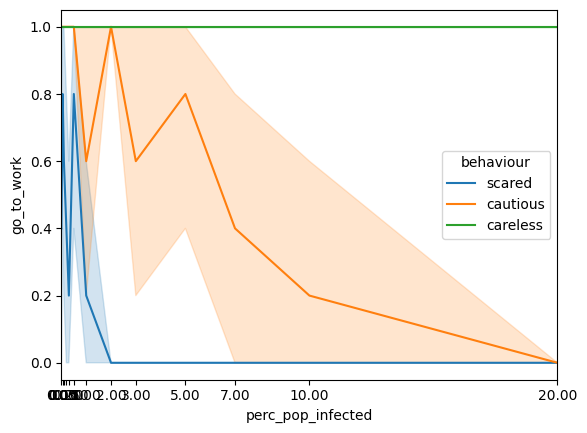

In [35]:
# plot results

import matplotlib.pyplot as plt
import seaborn as sns

# plot perc_pop_infected vs go_to_work, with hue=behaviour

sns.lineplot(data=new_df, x='perc_pop_infected', y='go_to_work', hue='behaviour')

# x axis without scale 
# plot x ticks: [0.0, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 7, 10, 20, 50]

plt.xticks([0.0, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 7, 10, 20, 50])

# xlim to 10 

plt.xlim(0, 20)